# Analyse en composantes principales

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
from plydata import *
import pandas as pd
url = "D:/Bureau/PythonProject/packages/scientisttools/scientisttools/data"
decathlon = pd.read_excel(url+"/decathlon2.xlsx",header=0,sheet_name=0,index_col=0)
decathlon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, SEBRLE to Drews
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X100m         27 non-null     float64
 1   Long.jump     27 non-null     float64
 2   Shot.put      27 non-null     float64
 3   High.jump     27 non-null     float64
 4   X400m         27 non-null     float64
 5   X110m.hurdle  27 non-null     float64
 6   Discus        27 non-null     float64
 7   Pole.vault    27 non-null     float64
 8   Javeline      27 non-null     float64
 9   X1500m        27 non-null     float64
 10  Rank          27 non-null     int64  
 11  Points        27 non-null     int64  
 12  Competition   27 non-null     object 
dtypes: float64(10), int64(2), object(1)
memory usage: 3.0+ KB


In [3]:
decathlon.head(6)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
name,,,,,,,,,,,,,
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar


In [4]:
# Instanciation du modèle
from scientisttools.decomposition import PCA
res_pca = PCA(standardize=True,ind_sup=list(range(23,27)),quanti_sup=[10,11],quali_sup=12,parallelize=True)
res_pca.fit(decathlon)

PCA(ind_sup=[23, 24, 25, 26], parallelize=True, quali_sup=12,
    quanti_sup=[10, 11])

## Eigenvalues

In [5]:
# Extract eigenvalues/variances
from scientisttools.extractfactor import get_eigenvalue
eig_val = get_eigenvalue(res_pca)
print(eig_val)

        eigenvalue  difference  proportion  cumulative
Dim.1     4.124213    2.285682   41.242133   41.242133
Dim.2     1.838531    0.599391   18.385309   59.627443
Dim.3     1.239140    0.419700   12.391403   72.018845
Dim.4     0.819440    0.117887    8.194402   80.213247
Dim.5     0.701553    0.278670    7.015528   87.228776
Dim.6     0.422883    0.120301    4.228828   91.457604
Dim.7     0.302582    0.028112    3.025817   94.483420
Dim.8     0.274470    0.119253    2.744700   97.228120
Dim.9     0.155217    0.033246    1.552169   98.780290
Dim.10    0.121971         NaN    1.219710  100.000000


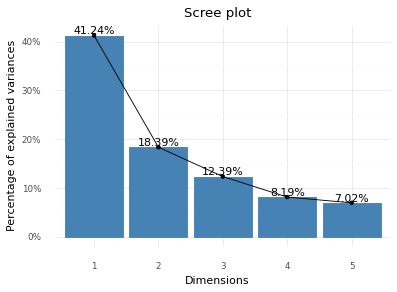

In [6]:
from scientisttools.ggplot import fviz_eig
p = fviz_eig(res_pca,add_labels=True)
print(p)

## Graph of variables

In [7]:
from scientisttools.extractfactor import get_pca_var
var = get_pca_var(res_pca)
var.keys()

dict_keys(['coord', 'cor', 'cos2', 'contrib', 'weighted_corr', 'infos'])

In [8]:
# Coordinates
var["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.850626,-0.179398,0.301556,0.033573,-0.194444
Long.jump,0.794181,0.280857,-0.190547,-0.115390,0.233157
Shot.put,0.733913,0.085404,0.517598,0.128468,-0.248813
High.jump,0.610084,-0.465214,0.330085,0.144550,0.402700
X400m,-0.701603,0.290178,0.283533,0.430826,0.103909
X110m.hurdle,-0.764125,-0.024741,0.448887,-0.016896,0.224220


### Correlation circle

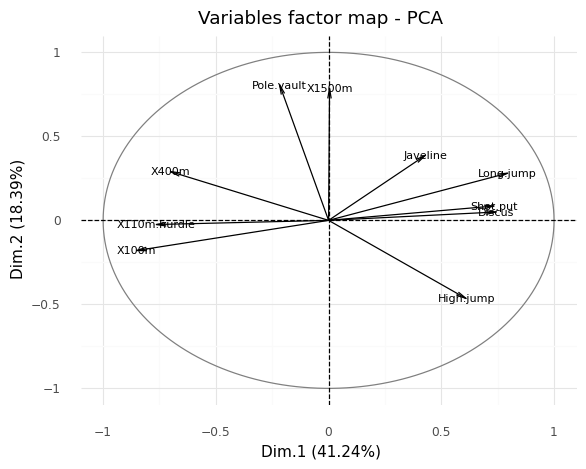

In [9]:
from scientisttools.ggplot import fviz_pca_var
p = fviz_pca_var(res_pca,color="black",quanti_sup=False)
print(p)

### Quality of representation

In [10]:
# Cos2
var["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.723564,0.032184,0.090936,0.001127,0.037808
Long.jump,0.630723,0.078881,0.036308,0.013315,0.054362
Shot.put,0.538628,0.007294,0.267907,0.016504,0.061908
High.jump,0.372202,0.216424,0.108956,0.020895,0.162167
X400m,0.492247,0.084203,0.080391,0.185611,0.010797
X110m.hurdle,0.583887,0.000612,0.201500,0.000285,0.050275


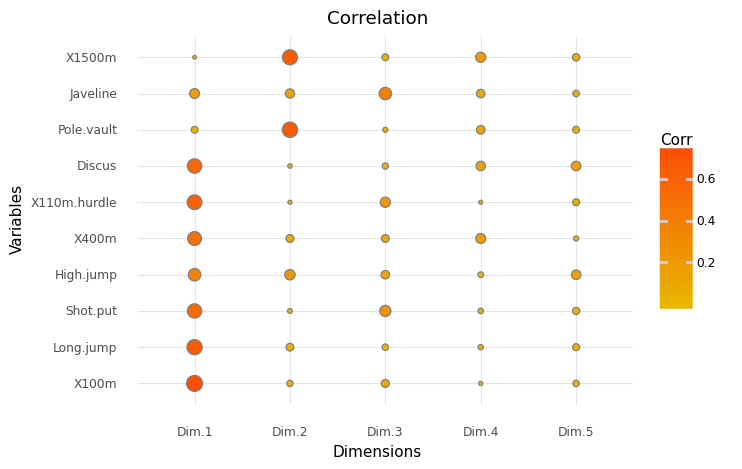

In [11]:
from scientisttools.ggplot import fviz_corrplot
cos2 = var["cos2"]
p = fviz_corrplot(cos2,method="circle",colors=["#00AFBB", "#E7B800", "#FC4E07"])
print(p)


In [12]:
from scientisttools.ggplot import fviz_cosines
#p = fviz_cosines(res_pca,choice="var",axis=0)
#print(p)

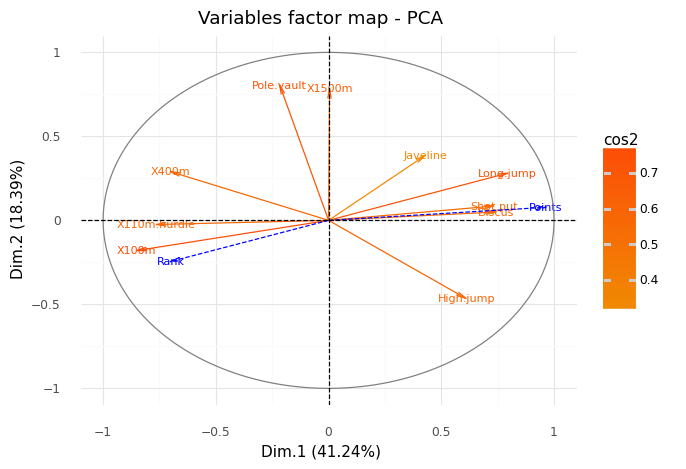

In [13]:
p = fviz_pca_var(res_pca,color="cos2",gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

In [14]:
#p = fviz_cosines(res_pca,choice="var",axis=0)
#print(p)

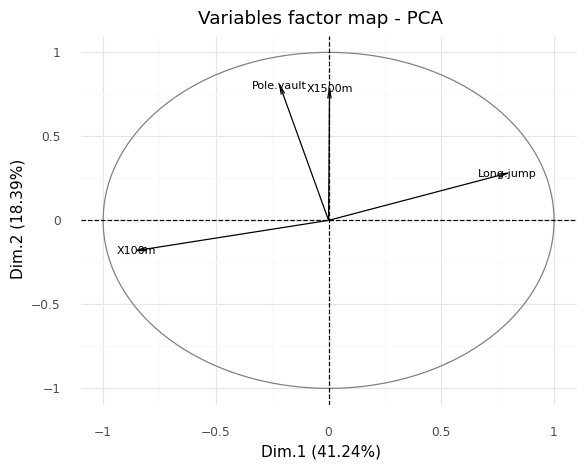

In [15]:
# Plot labels with cos2 > 0.6
p = fviz_pca_var(res_pca,color="black",lim_cos2=0.6,quanti_sup=False)
print(p)

#### Contributions

In [16]:
# Contributions
var["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.750510,7.338659,0.137552,5.389252
Long.jump,15.293168,4.290416,2.930094,1.624859,7.748815
Shot.put,13.060137,0.396722,21.620432,2.014073,8.824401
High.jump,9.024811,11.771584,8.792888,2.549880,23.115504
X400m,11.935544,4.579930,6.487636,22.650906,1.539012
X110m.hurdle,14.157544,0.033293,16.261261,0.034837,7.166193


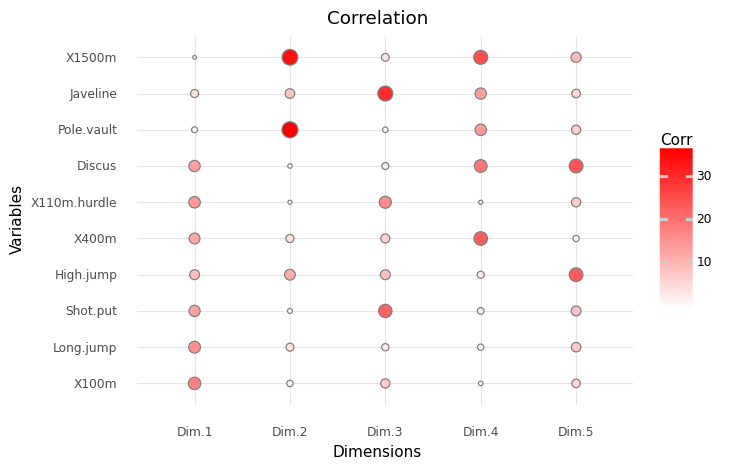

In [17]:
p = fviz_corrplot(var["contrib"])
print(p)

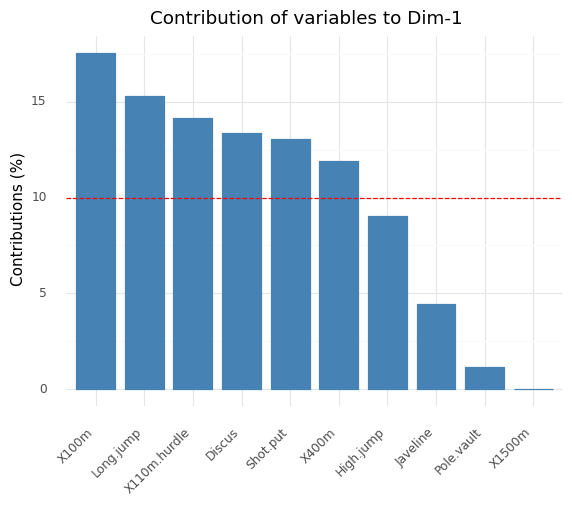

In [18]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(res_pca,choice="var",axis=0,top_contrib=10)
print(p)

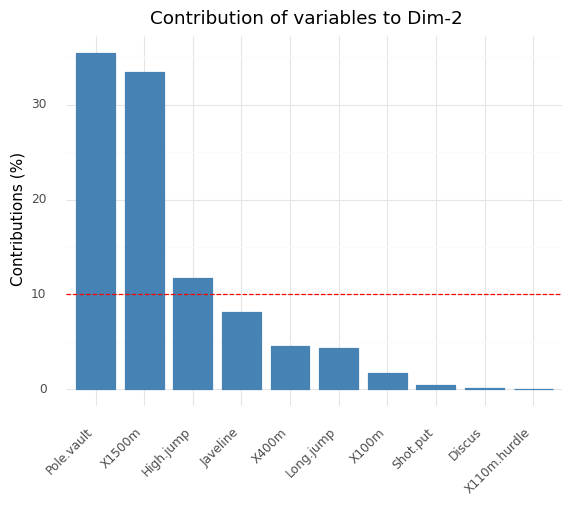

In [19]:
p = fviz_contrib(res_pca,choice="var",axis=1,top_contrib=10)
print(p)

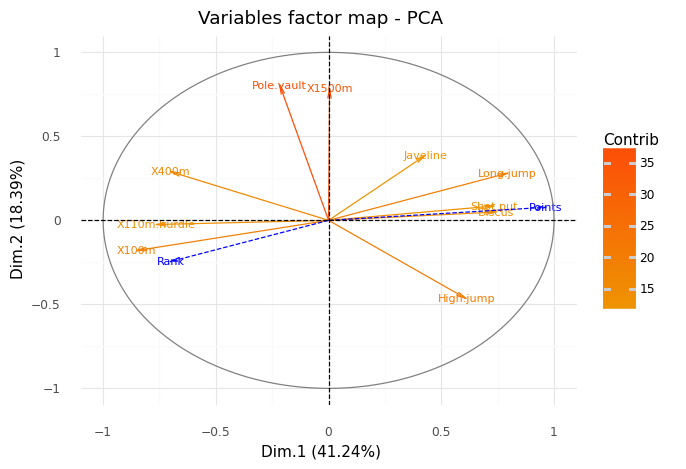

In [20]:
p = fviz_pca_var(res_pca,
                 color="contrib",
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"))
print(p)

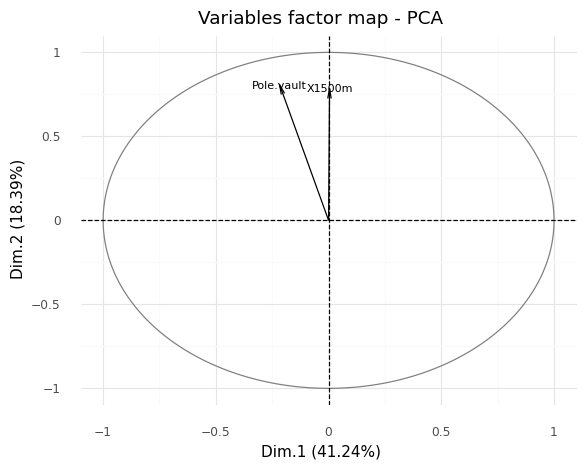

In [21]:
p = fviz_pca_var(res_pca,color="black",lim_contrib=25,quanti_sup=False)
print(p)

### Color by a custom continuous

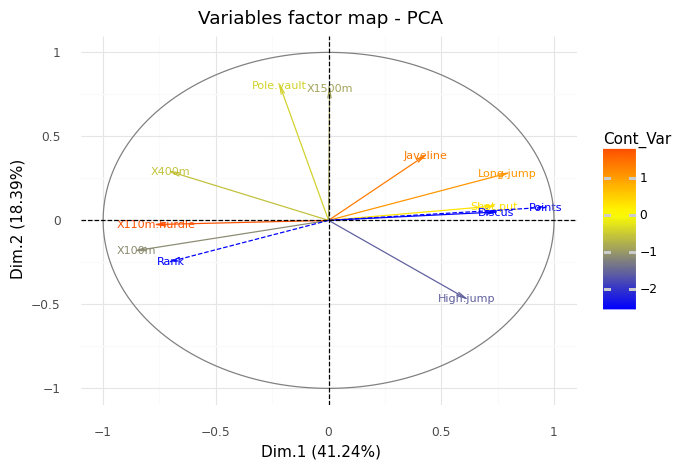

In [22]:
import numpy as np 
np.random.seed(123)
my_cont_var = np.random.normal(size=10)
p = fviz_pca_var(res_pca,color=my_cont_var,gradient_cols = ["blue", "yellow", "red"])
print(p)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(var["coord"])
kmeans.labels_

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 2])

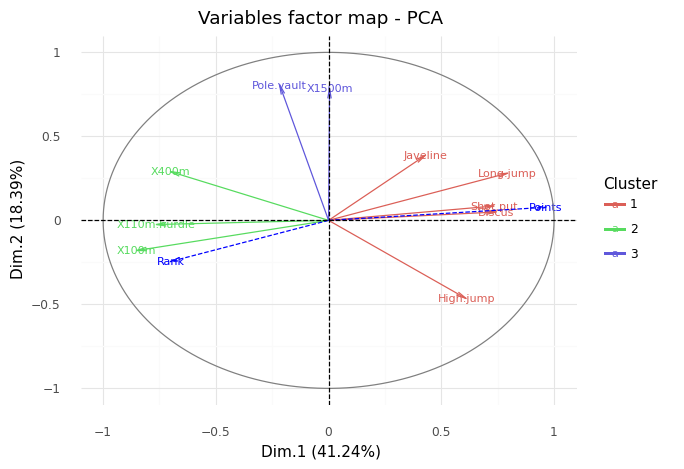

In [24]:
p = fviz_pca_var(res_pca,
                 color=kmeans,
                 gradient_cols = ["blue", "yellow", "red"],
                 legend_title="Cluster")
print(p)

In [25]:
from scientisttools.extractfactor import dimdesc
dim_desc = dimdesc(res_pca,axis=[0,1,2])
dim_desc.keys()

dict_keys(['Dim.1', 'Dim.2', 'Dim.3'])

In [26]:
dim_desc["Dim.1"]["quanti"]

,correlation,pvalue
Points,0.963708,1.605675e-13
Long.jump,0.794181,6.059893e-06
Discus,0.743209,4.842563e-05
Shot.put,0.733913,6.723102e-05
High.jump,0.610084,1.993677e-03
Javeline,0.428227,4.149192e-02
Rank,-0.701478,1.917657e-04
X400m,-0.701603,1.910387e-04
X110m.hurdle,-0.764125,2.195812e-05
X100m,-0.850626,2.727129e-07


In [27]:
dim_desc["Dim.1"]["quali"]

,Sum. Intra,Sum. Inter,correlation ratio,F-stats,pvalue
Competition,56.804418,38.052489,0.401157,14.067608,0.001177


In [28]:
dim_desc["Dim.2"]

,correlation,pvalue
Pole.vault,0.807451,0.000003
X1500m,0.784480,0.000009
High.jump,-0.465214,0.025294


In [29]:
dim_desc["Dim.3"]

,correlation,pvalue
Javeline,0.604124,0.002267
Shot.put,0.517598,0.011420
X110m.hurdle,0.448887,0.031668


## Graph of individuals

### Result

In [30]:
from scientisttools.extractfactor import get_pca_ind
row = get_pca_ind(res_pca)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'dist', 'infos'])

In [31]:
row["coord"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.195505,1.589057,0.642491,0.083897,1.168294
CLAY,0.807879,2.474814,-1.387383,1.298382,-0.824982
BERNARD,-1.359134,1.648095,0.200558,-1.964094,0.084193
YURKOV,-0.888953,-0.442607,2.529584,0.712908,0.407823
ZSIVOCZKY,-0.108122,-2.068838,-1.334259,-0.101528,-0.201452
McMULLEN,0.121220,-1.013910,-0.862517,1.341643,1.621513


### Plots  : quality and contribution

In [32]:
row["contrib"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.040294,5.971453,1.448392,0.037346,8.458941
CLAY,0.688057,14.483925,6.753738,8.944583,4.217944
BERNARD,1.947402,6.423411,0.141135,20.468194,0.043931
YURKOV,0.833084,0.463273,22.451740,2.696636,1.030753
ZSIVOCZKY,0.012324,10.121714,6.246432,0.054692,0.251510
McMULLEN,0.015491,2.431085,2.610279,9.550559,16.294933


Like variables, it's also possible to color individuals by their cos2 values:

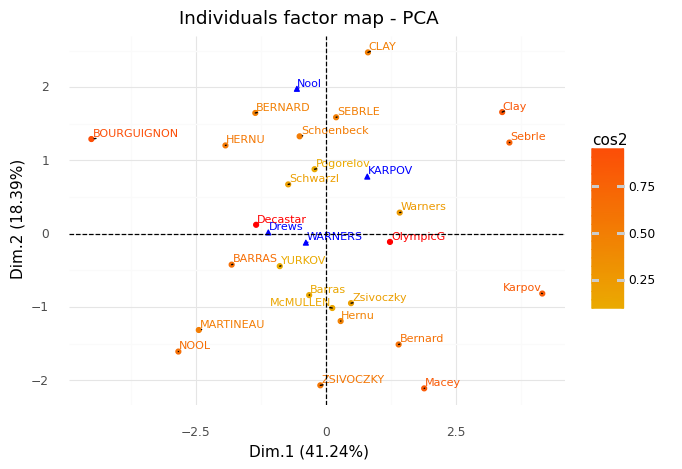

In [33]:
#
from scientisttools.ggplot import fviz_pca_ind
p = fviz_pca_ind(res_pca, color= "cos2", 
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel = True# Avoid text overlapping (slow if many points)
                 )
print(p)

In [34]:
from scientisttools.ggplot import fviz_cosines
#p = fviz_cosines(res_pca,choice="ind")
#print(p)

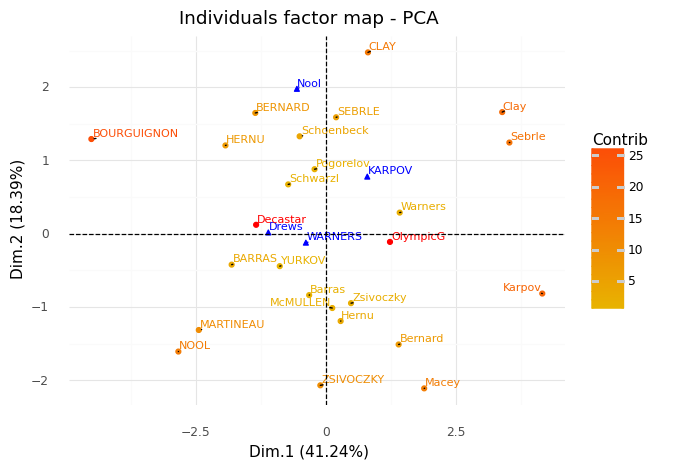

In [35]:
# 
p = fviz_pca_ind(res_pca, color= "contrib", 
                 gradient_cols = ("#00AFBB", "#E7B800", "#FC4E07"),
                 repel = True# Avoid text overlapping (slow if many points)
                 )
print(p)

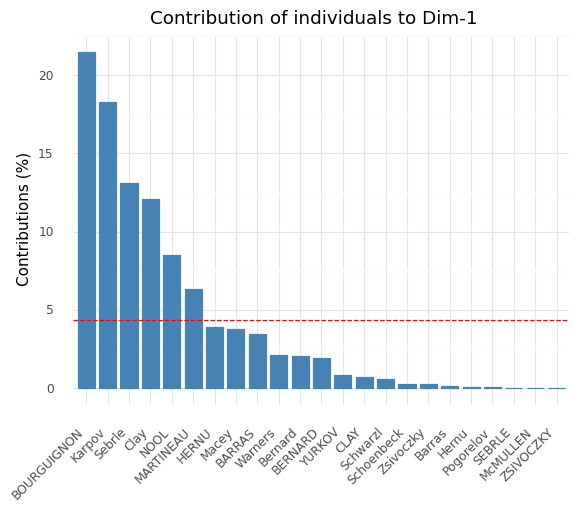

In [36]:
p = fviz_contrib(res_pca,choice="ind")
print(p)

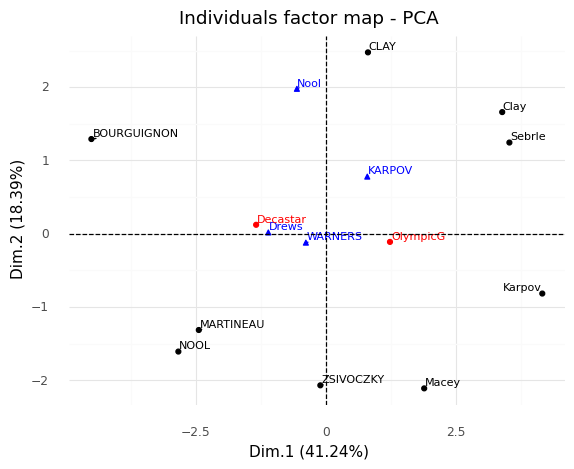

In [37]:
p = fviz_pca_ind(res_pca,
                 color="black",
                 lim_contrib=10,
                 repel=True)
print(p)

### Color by a custom continuous variable

In [38]:
np.random.seed(123)
my_cont_var = np.random.normal(size=23)
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128  2.20593008  2.18678609
  1.0040539   0.3861864   0.73736858  1.49073203 -0.93583387]


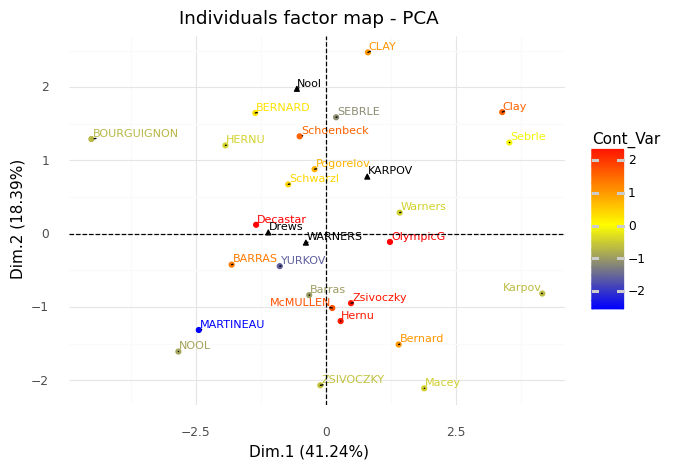

In [39]:
p = fviz_pca_ind(res_pca, color = my_cont_var,
                 gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cont_Var",
                 ind_sup=True,
                 color_sup="black",
                 repel=True)
print(p)

In [40]:
kmeans = KMeans(n_clusters=3,random_state=np.random.seed(123), n_init="auto").fit(row["coord"])
kmeans.labels_

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       1])

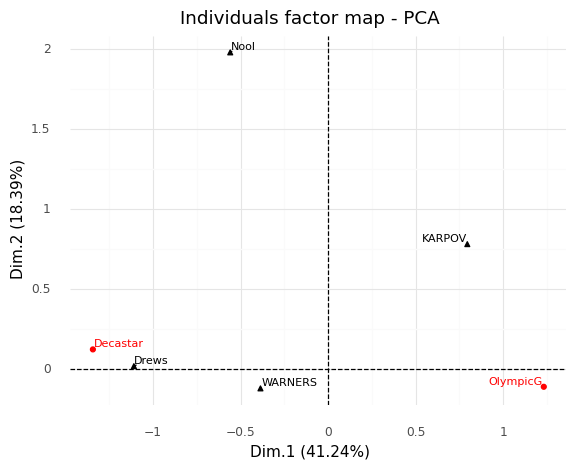

In [41]:
p = fviz_pca_ind(res_pca, color = kmeans,
                 gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cluster",
                 ind_sup=True,
                 color_sup="black",
                 repel=True)
print(p)## Quantit# # #  FcFF# 

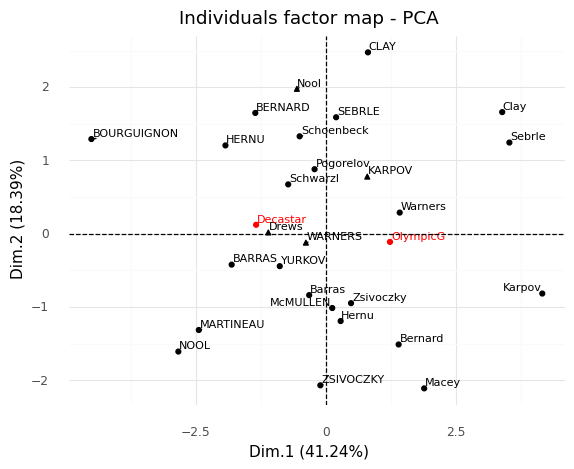

In [42]:
p = fviz_pca_ind(res_pca, habillage=None,
                 #gradient_cols = ("blue", "yellow", "red"),
                 legend_title = "Cluster",
                 ind_sup=True,
                 color_sup="black",
                 repel=True)
print(p)

In [43]:
row["cos2"].head(6)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.007530,0.497473,0.081325,0.001387,0.268903
CLAY,0.048701,0.457017,0.143628,0.125792,0.050785
BERNARD,0.197200,0.289966,0.004294,0.411819,0.000757
YURKOV,0.096110,0.023826,0.778230,0.061813,0.020228
ZSIVOCZKY,0.001574,0.576419,0.239754,0.001388,0.005465
McMULLEN,0.002175,0.152195,0.110138,0.266487,0.389262


In [44]:
row["infos"]

,dist,weight,inertia
name,,,
SEBRLE,2.252966,0.043478,0.220689
CLAY,3.660804,0.043478,0.582673
BERNARD,3.060617,0.043478,0.407277
YURKOV,2.867445,0.043478,0.357489
ZSIVOCZKY,2.724941,0.043478,0.322839
McMULLEN,2.598958,0.043478,0.293678
MARTINEAU,3.848396,0.043478,0.643920
HERNU,3.059956,0.043478,0.407101
BARRAS,2.311227,0.043478,0.232251


In [45]:
ind_sup = res_pca.ind_sup_
ind_sup.keys()

dict_keys(['coord', 'cos2', 'dist'])

In [46]:
ind_sup["coord"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.794721,0.779512,-1.633020,1.724228,-0.750704
WARNERS,-0.386464,-0.121592,-1.738733,-0.706334,-0.032300
Nool,-0.559131,1.977489,-0.483036,-2.278453,-0.254615
Drews,-1.109204,0.017415,-3.048818,-1.534347,-0.326422


In [47]:
ind_sup["cos2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.051047,0.049112,0.215537,0.240286,0.045549
WARNERS,0.024227,0.002398,0.490397,0.080929,0.000169
Nool,0.028971,0.362387,0.021622,0.481088,0.006008
Drews,0.092071,0.000023,0.695605,0.176176,0.007974


In [48]:
var_sup = res_pca.quali_sup_
var_sup.keys()

dict_keys(['coord', 'cos2', 'vtest', 'dist', 'eta2', 'barycentre'])

In [49]:
var_sup["coord"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-1.343451,0.121810,-0.037895,0.180836,0.134336
OlympicG,1.231497,-0.111659,0.034737,-0.165766,-0.123142


In [50]:
var_sup["cos2"]

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,0.905123,0.007441,0.00072,0.0164,0.00905
OlympicG,0.905123,0.007441,0.00072,0.0164,0.00905


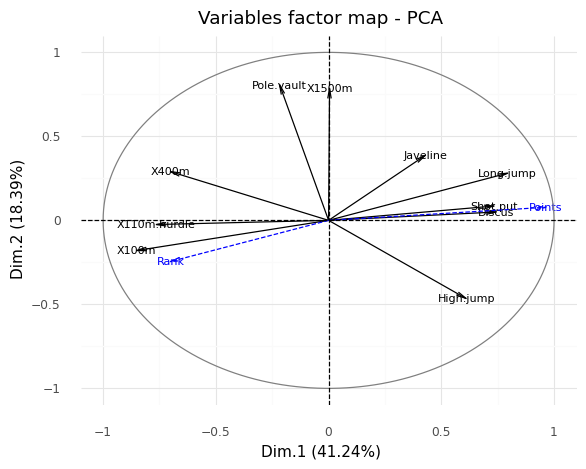

In [51]:
p = fviz_pca_var(res_pca,color="black",color_sup="blue")
print(p)

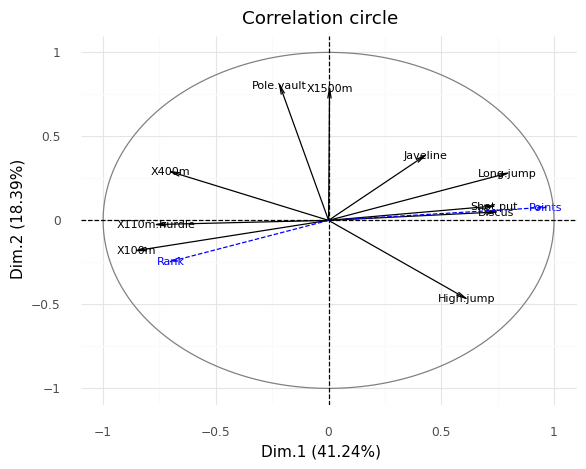

In [52]:
from scientisttools.ggplot import fviz_corrcircle
p = fviz_corrcircle(res_pca)
print(p)

### Reconstitution des données

In [53]:
from scientisttools.extractfactor import reconst
X = reconst(res_pca,n_components=2)
X

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m
name,,,,,,,,,,
SEBRLE,10.913526,7.473883,14.761055,1.961392,49.701467,14.485381,45.582494,5.022376,61.495392,286.883716
CLAY,10.803466,7.603517,14.989972,1.950052,49.679795,14.368696,46.417030,5.135125,63.334194,291.914078
BERNARD,11.103011,7.291289,14.299982,1.915316,50.242918,14.761684,43.738791,5.071552,59.995789,287.186092
YURKOV,11.126477,7.214914,14.331568,1.996499,49.642238,14.696018,44.049439,4.755404,57.603233,275.352163
ZSIVOCZKY,11.093520,7.205262,14.480068,2.071438,49.033755,14.571028,44.785241,4.498652,56.164263,266.155825
McMULLEN,11.024121,7.299725,14.603432,2.043728,49.178078,14.521084,45.183946,4.645991,57.845896,272.136621
MARTINEAU,11.352522,6.972959,13.821336,1.980529,49.988470,14.980804,42.091899,4.669442,54.823816,270.384804
HERNU,11.191141,7.194304,14.105429,1.913375,50.344969,14.867789,43.002175,5.022142,58.803298,284.663851
BARRAS,11.239824,7.105316,14.056373,1.969537,49.961509,14.860609,42.950283,4.782591,56.690920,275.450921
